Data ini merupakan data penjualan supercenter, dimana variabel (feature) nya antara lain :

- Invoice ID, merupakan nomor identifikasi invoice penjualan yang dihasilkan komputer.
- Branch, merupakan cabang supercenter. Terkategori dengan 'A', 'B', atau 'C'.
- City, merupakan lokasi supercenter. Terkategori dengan 'Yangon', 'Mandalay', atau 'Naypitaw'.
- Customer type, merupakan tipe dari customer. Terkategori dengan 'Member' (untuk customer yang menggunakan kartu member) atau 'Normal' (untuk customer yang tidak menggunakan kartu member).
- Gender, merupakan jenis kelamin dari customer. Terkategori dengan 'Female' atau 'Male'.
- Product line, merupakan penggolongan item grup secara umum. Terkategori dengan 'Fashion accessories', 'Food and beverage', 'Health and beauty', 'Electronic accessories', 'Home and lifestyle', atau 'Sport and travel'.
- Unit price, merupakan harga per item (dalam dollar).
- Quantity, merupakan banyaknya item yang dibayar oleh customer.
- Tax 5%, merupakan biaya pajak 5% yang harus dibayar oleh customer (dalam dollar).
- Total, merupakan total harga yang dibayar oleh customer (dalam dollar).
- Date, merupakan tanggal pembelian.
- Time, merupakan waktu pembelian.
- Payment, merupakan metode pembayaran yang digunakan customer. Terkategori dengan 'Ewallet', 'Cash', atau 'Credit card'.
- cogs, merupakan harga pokok penjualan (dalam dollar).
- gross margin percentage, merupakan presentase margin kotor (dalam %).
- gross income, merupakan pendapatan kotor (dalam dollar).
- Rating, merupakan nilai yang diberikan customer berdasarkan pengalaman berbelanja mereka (berskala 1 - 10).

In [1]:
# Importing modules
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline

plt.style.use('bmh'); sns.set()

In [2]:
# Importing csv data 
sales = pd.read_csv('D:supermarket_sales - Sheet1.csv')
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
# Drop kolom untuk feature yang tidak berguna
sales.drop(["Invoice ID", "Branch", "Time","cogs", "gross margin percentage"], axis=1, inplace=True)
sales.dtypes

City              object
Customer type     object
Gender            object
Product line      object
Unit price       float64
Quantity           int64
Tax 5%           float64
Total            float64
Date              object
Payment           object
gross income     float64
Rating           float64
dtype: object

In [4]:
# Wrangling data
for col in ['City', 'Customer type', 'Gender', 'Product line','Payment']:
    sales[col] = sales[col].astype('category')

sales['Date'] = pd.to_datetime(sales['Date'])

sales.dtypes

City                   category
Customer type          category
Gender                 category
Product line           category
Unit price              float64
Quantity                  int64
Tax 5%                  float64
Total                   float64
Date             datetime64[ns]
Payment                category
gross income            float64
Rating                  float64
dtype: object

In [5]:
# Basic statistics
sales.describe(include='all')

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,gross income,Rating
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000.00000
unique,3,2,2,6,NaN,NaN,NaN,NaN,89,3,NaN,NaN
top,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2019-02-07 00:00:00,Ewallet,NaN,NaN
freq,340,501,501,178,NaN,NaN,NaN,NaN,20,345,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-30 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,15.379369,6.97270
std,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,11.708825,1.71858
min,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,5.924875,5.50000


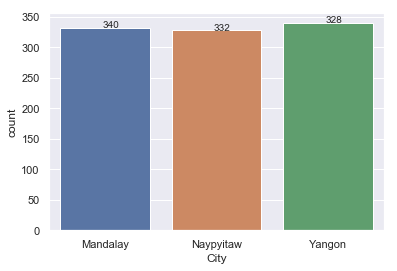

In [6]:
# BarChart untuk melihat bagaimana jumlah customer di supercenter tiap-tiap kota ?
col = 'City'
ax = sns.countplot(x=col, data=sales)
for p, label in zip(ax.patches, sales[col].value_counts().values):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))

Kesimpulan : Ternyata jumlah customer dari setiap cabang supercenter hampir sama atau tidak berbeda jauh. Jumlah customer di cabang Yangon sedikit lebih tinggi dibandingkan dengan di dua cabang lainnya.

Hipotesa 1 : Karena jumlah customer di supercenter kota Yangon lebih banyak maka saya berhipotesis bahwa supercenter di kota Yangon lah yang mendapatkan pendapatan paling besar dibanding dengan dua supercenter di kota lainnya.

In [7]:
# Hipotesa 1 Apakah supercenter di kota Yangon memiliki pendapatan paling tinggi dibanding dengan dua lainnya ?
sales.groupby(["City"]).sum()

,Unit price,Quantity,Tax 5%,Total,gross income,Rating
City,,,,,,
Mandalay,18478.88,1820,5057.0320,106197.6720,5057.0320,2263.6
Naypyitaw,18567.76,1831,5265.1765,110568.7065,5265.1765,2319.9
Yangon,18625.49,1859,5057.1605,106200.3705,5057.1605,2389.2


Kesimpulan : Dengan melihat nilai pada kolom 'gross income' ternyata total gross income yang diperoleh supercenter kota Yangon tidaklah yang paling banyak justru supercenter di kota Naypyitaw lah yang mendapatkan total gross income lebih tinggi dibandingkan dengan yang lainnya. Hal ini menunjukkan bahwa banyaknya jumlah customer tidak mempengaruhi total gross income yang diperoleh.

Hipotesa 2 : Saya berhipotesis bahwa jumlah customer di supercenter kota Yangon lebih tinggi dibandingkan dengan dua lainnya dikarenakan rating supercenter kota Yangon yang lebih tinggi dibanding dengan dua lainnya. Hipotesa 3 : Karena supercenter di kota Naypyitaw memiliki total gross income lebih tinggi dibandingkan dengan dua lainnya, maka saya berhipotesis bahwa customer supercenter di Naypyitaw secara rata-rata lebih tinggi menghabiskan uangnya untuk berbelanja.

In [8]:
# Hipotesa 2 & 3 Bagaimanakah rata-rata total dan gross income dari masing-masing supercenter ?
sales.groupby(["City"]).mean()

,Unit price,Quantity,Tax 5%,Total,gross income,Rating
City,,,,,,
Mandalay,55.659277,5.481928,15.232024,319.872506,15.232024,6.818072
Naypyitaw,56.609024,5.582317,16.052367,337.099715,16.052367,7.072866
Yangon,54.780853,5.467647,14.874001,312.354031,14.874001,7.027059


Kesimpulan : Dengan melihat nilai pada kolom 'Rating' ternyata rating yang diperoleh supercenter di Yangon dan supercenter di Naypyitaw tidak lah berbeda jauh, sedangkan supercenter di Mandalay mendapat rating yang terendah. Hal ini menunjukkan bahwa rating yang diperoleh oleh masing-masing supercenter dapat mempengaruhi jumlah customer.

Saran : Sebaiknya supercenter di Mandalay menaikkan rating nya yaitu dapat dilakukan dengan memperbaiki cara melayani customer agar customer yang datang kesana memberikan rating yang baik sesuai dengan pengalaman berbelanja nya.

Kesimpulan : Dengan melihat nilai pada kolom 'total' diperoleh bahwa customer supercenter di Naypyitaw lebih tinggi secara rata-rata untuk menghabiskan uangnya. Hal ini menunjukkan bahwa gross income sangat dipengaruhi oleh total.

In [9]:
def groupedbarplot(df, width=0.8, annotate="values", ax=None, **kw):
    ax = ax or plt.gca()
    n = len(df.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(df.columns, pos):
        bars.append(ax.bar(np.arange(len(df))+x, df[col].values, width=w, **kw))
        # matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
        for val, xi in zip(df[col].values, np.arange(len(df))+x):
            if annotate:
                txt = val if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2), 
                            textcoords="offset points",
                            ha="center", va="bottom")
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df.index)
    return bars

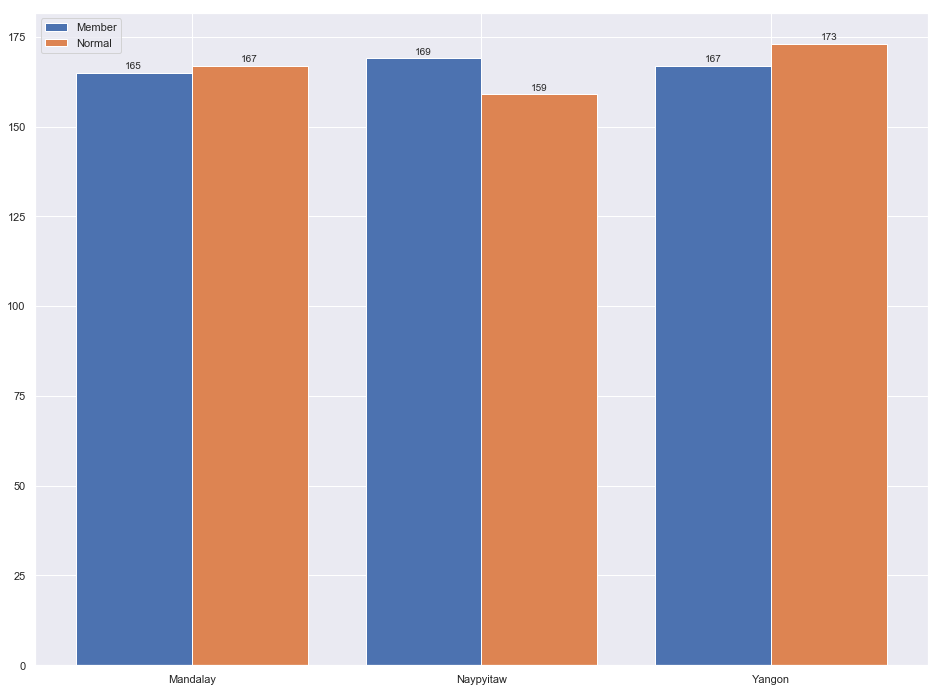

In [10]:
# BarChart untuk melihat berapa banyak customer yang merupakan member dari masing-masing supercenter ?
counts = sales.groupby(["City", "Customer type"]).size().unstack()
plt.figure(figsize=(16,12))
groupedbarplot(counts)
labels = ('Member','Normal')
plt.legend(labels, loc='best')
plt.show()

Kesimpulan : Ternyata jumlah customer yang merupakan member dan yang bukan dari masing-masing supercenter tidak berbeda jauh. Jumlah customer yang merupakan member dari supercenter di Mandalay ada sebanyak 165 customer, dari supercenter di Naypyitaw ada sebanyak 169 customer, dan dari supercenter di Yangon ada sebanyak 167 customer.

Hipotesa 4 : Saya berhipotesis bahwa produk berkategori 'health and beauty', 'Fashion accessories', 'Food and beverage', 'Home and lifestyle' banyak diminati oleh perempuan, sedangkan 'Electronic accessories' dan 'Sport and travel' banyak diminati oleh laki-laki.

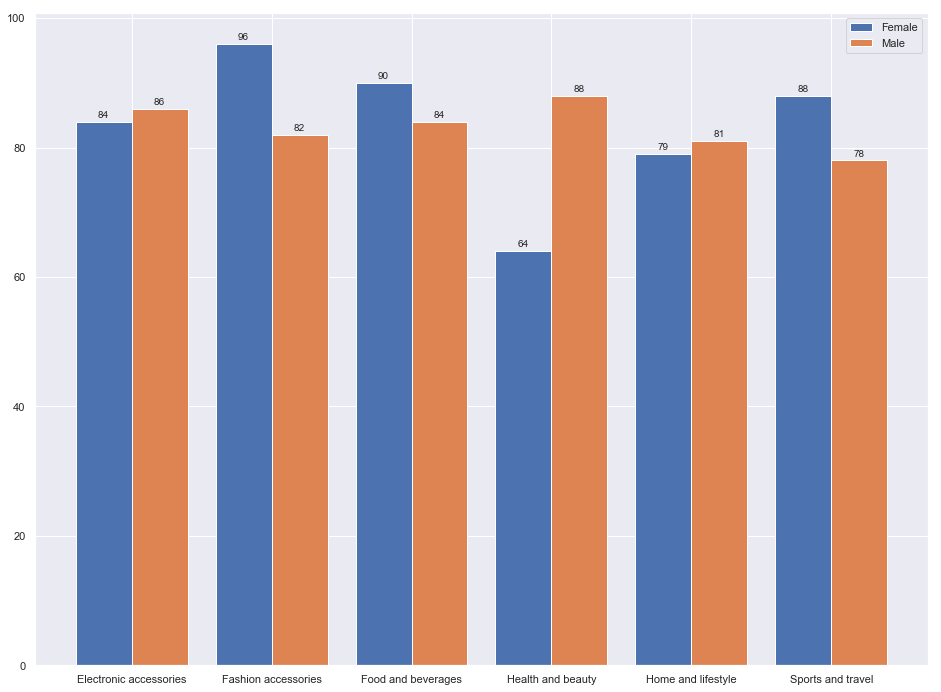

In [11]:
# Hipotesa 4 Apakah gender mempengaruhi apa yang dibeli ?
# BarChart untuk melihat jumlah pembelian kategori produk berdasarkan gender
counts = sales.groupby(["Product line", "Gender"]).size().unstack()
plt.figure(figsize=(16,12))
groupedbarplot(counts)
labels = ('Female','Male')
plt.legend(labels, loc='best')
plt.show()

Kesimpulan : Produk berkategori 'electronic accessories', 'health and beauty', dan 'home and lifestyle' ternyata banyak diminati oleh laki-laki. Sedangkan produk berkategori 'fashion accessories', 'food and beverage', dan 'sport and travel' banyak diminati oleh perempuan. Hal ini menunjukkan bahwa gender tidak lah mempengaruhi kategori produk apa yang dibeli.

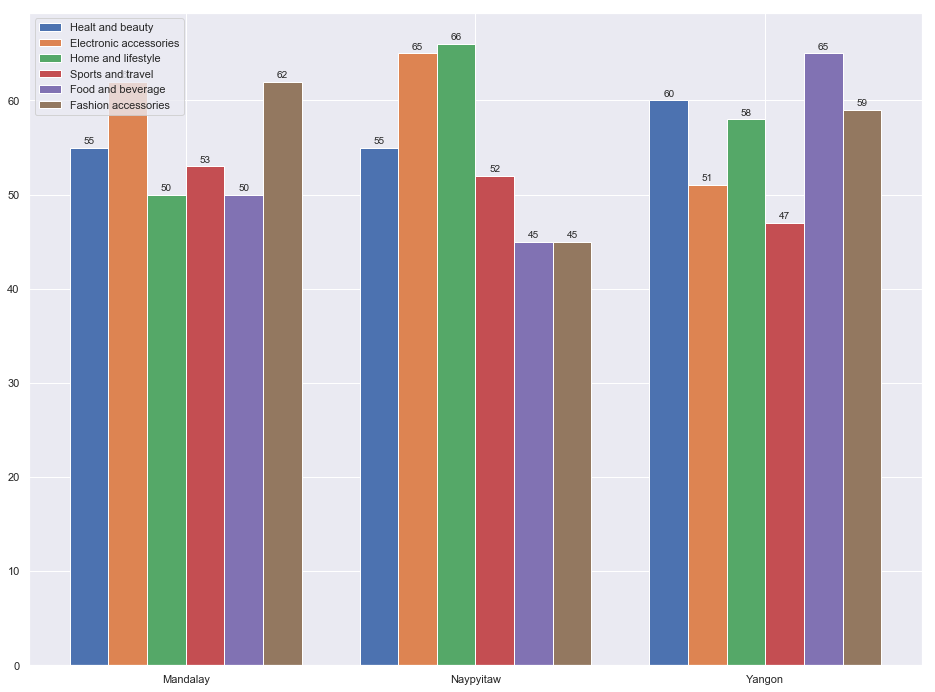

In [12]:
# BarChart untuk melihat produk berkategori apakah yang paling diminati di supercenter tiap-tiap kota ?
counts = sales.groupby(["City", "Product line"]).size().unstack()
plt.figure(figsize=(16,12))
groupedbarplot(counts)
labels = ('Healt and beauty','Electronic accessories','Home and lifestyle','Sports and travel','Food and beverage','Fashion accessories')
plt.legend(labels, loc='best')
plt.show()

Kesimpulan : Supercenter di Mandalay paling banyak diminati produk dengan kategori 'electronic accessories' dan 'fashion accessories'. Supercenter di Naypyitaw paling banyak diminati produk dengan kategori 'home and lifestyle'. Sedangkan supercenter di Yangon paling banyak diminati produk dengan kategori 'food and beverage'.

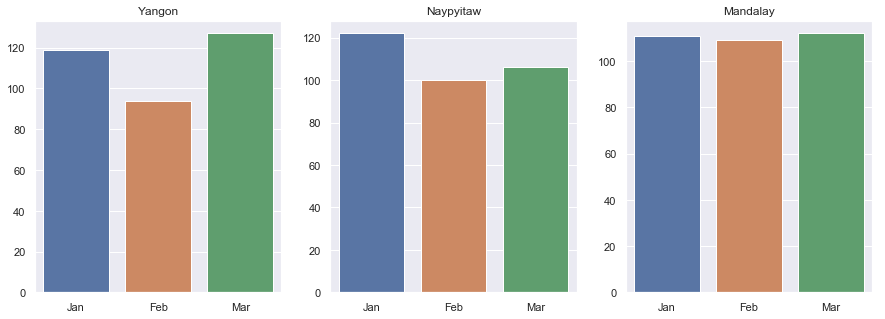

In [13]:
# Barchart bagaimanakah keadaan jumlah customer di masing-masing supercenter selama bulan Januari, Februari, dan Maret ?
sales['bulan'] = [i.month  for i in sales['Date']]

dic = {}
for kota in sales['City'].unique():
    df_kota = sales[sales['City']==kota]
    dic[kota] = []
    for bulan in range(1,4):
        dic[kota].append(len(df_kota[df_kota['bulan']==bulan]))
        
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Yangon')
sns.barplot(x=['Jan','Feb','Mar'], y=dic['Yangon'])
plt.subplot(132)
plt.title('Naypyitaw')
sns.barplot(x=['Jan','Feb','Mar'], y=dic['Naypyitaw'])
plt.subplot(133)
plt.title('Mandalay')
sns.barplot(x=['Jan','Feb','Mar'], y=dic['Mandalay'])

Kesimpulan : Jumlah customer dari masing-masing supercenter di bulan February mengalami penurunan. Jumlah customer tertinggi di supercenter kota Yangon terjadi di bulan Maret, di supercenter Naypyitaw terjadi di bulan Januari, dan di supercenter Mandalay terjadi di bulan Maret.